<a href="https://colab.research.google.com/github/rahool010/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv")
df.head()   # shows first 5 observations by default

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()  # shows last 5 observations by default

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# check the shape of the dataset
print(df.shape)

(119390, 32)


In [6]:
# check the datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# data summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


The dataset has 32 features (Continuous and Categorical)  with one identified dependant variable which is 'is_canceled'

In [8]:
# describe() method show statistical data like count,min,max,mean,etc for numerical values of dataframe
# so let's now get the summary for categorical values 
#df.describe(include='object').transpose()

In [9]:
# check missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

# Data Cleaning and Preparation

In [10]:
# check the count and percentage of null values
null_df=pd.DataFrame({'null_values':df.isnull().sum(),
                  'null_percent':df.isnull().sum()/df.shape[0]*100})
null_df=null_df[null_df['null_values']>0]
null_df

,null_values,null_percent
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [11]:
# company has a lot of null values so it is deleted and  
# reservation_status will not be relevant for our data analysis purpose, so drop this columns.

df = df.drop(['company','reservation_status_date'], axis=1)
print(df.shape)

(119390, 30)


In [12]:
# children country and agent has less than 20% missing values
# so missing values can be imputed using global constants
# fill null values in agent with 0 because it can be assumed that booking was without agent
# same with children and fill null values in country with global constant ('Unknown')

null_replace = {'children' : 0, 'country' : 'Unknown', 'agent': 0}

df = df.fillna(null_replace)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [13]:
# after handling the missing values
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [14]:
# printing unique values of each column 

for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

is_canceled: 
[0 1]

lead_time: 
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193

In [15]:
# let's create a new column to indicate
# 0 - reserved room and assigned room is different
# 1 - reserved room and assigned room is same
df['same_room'] = np.where(df['reserved_room_type']==df['assigned_room_type'],1,0) 

In [16]:
df['same_room'].value_counts()

1    104473
0     14917
Name: same_room, dtype: int64

In [17]:
# There are 'Undefined' meals, these are nothing but no meal packages
# So we can replace 'Undefined' with 'SC' it means no meal package.
df['meal'] = df.meal.replace('Undefined', 'SC')

In [18]:
#plt.figure(figsize=(16,9))
#sns.heatmap(data.isnull())
#plt.show()

# **Exploratory Analysis and Visualization**

# Basic Analysis

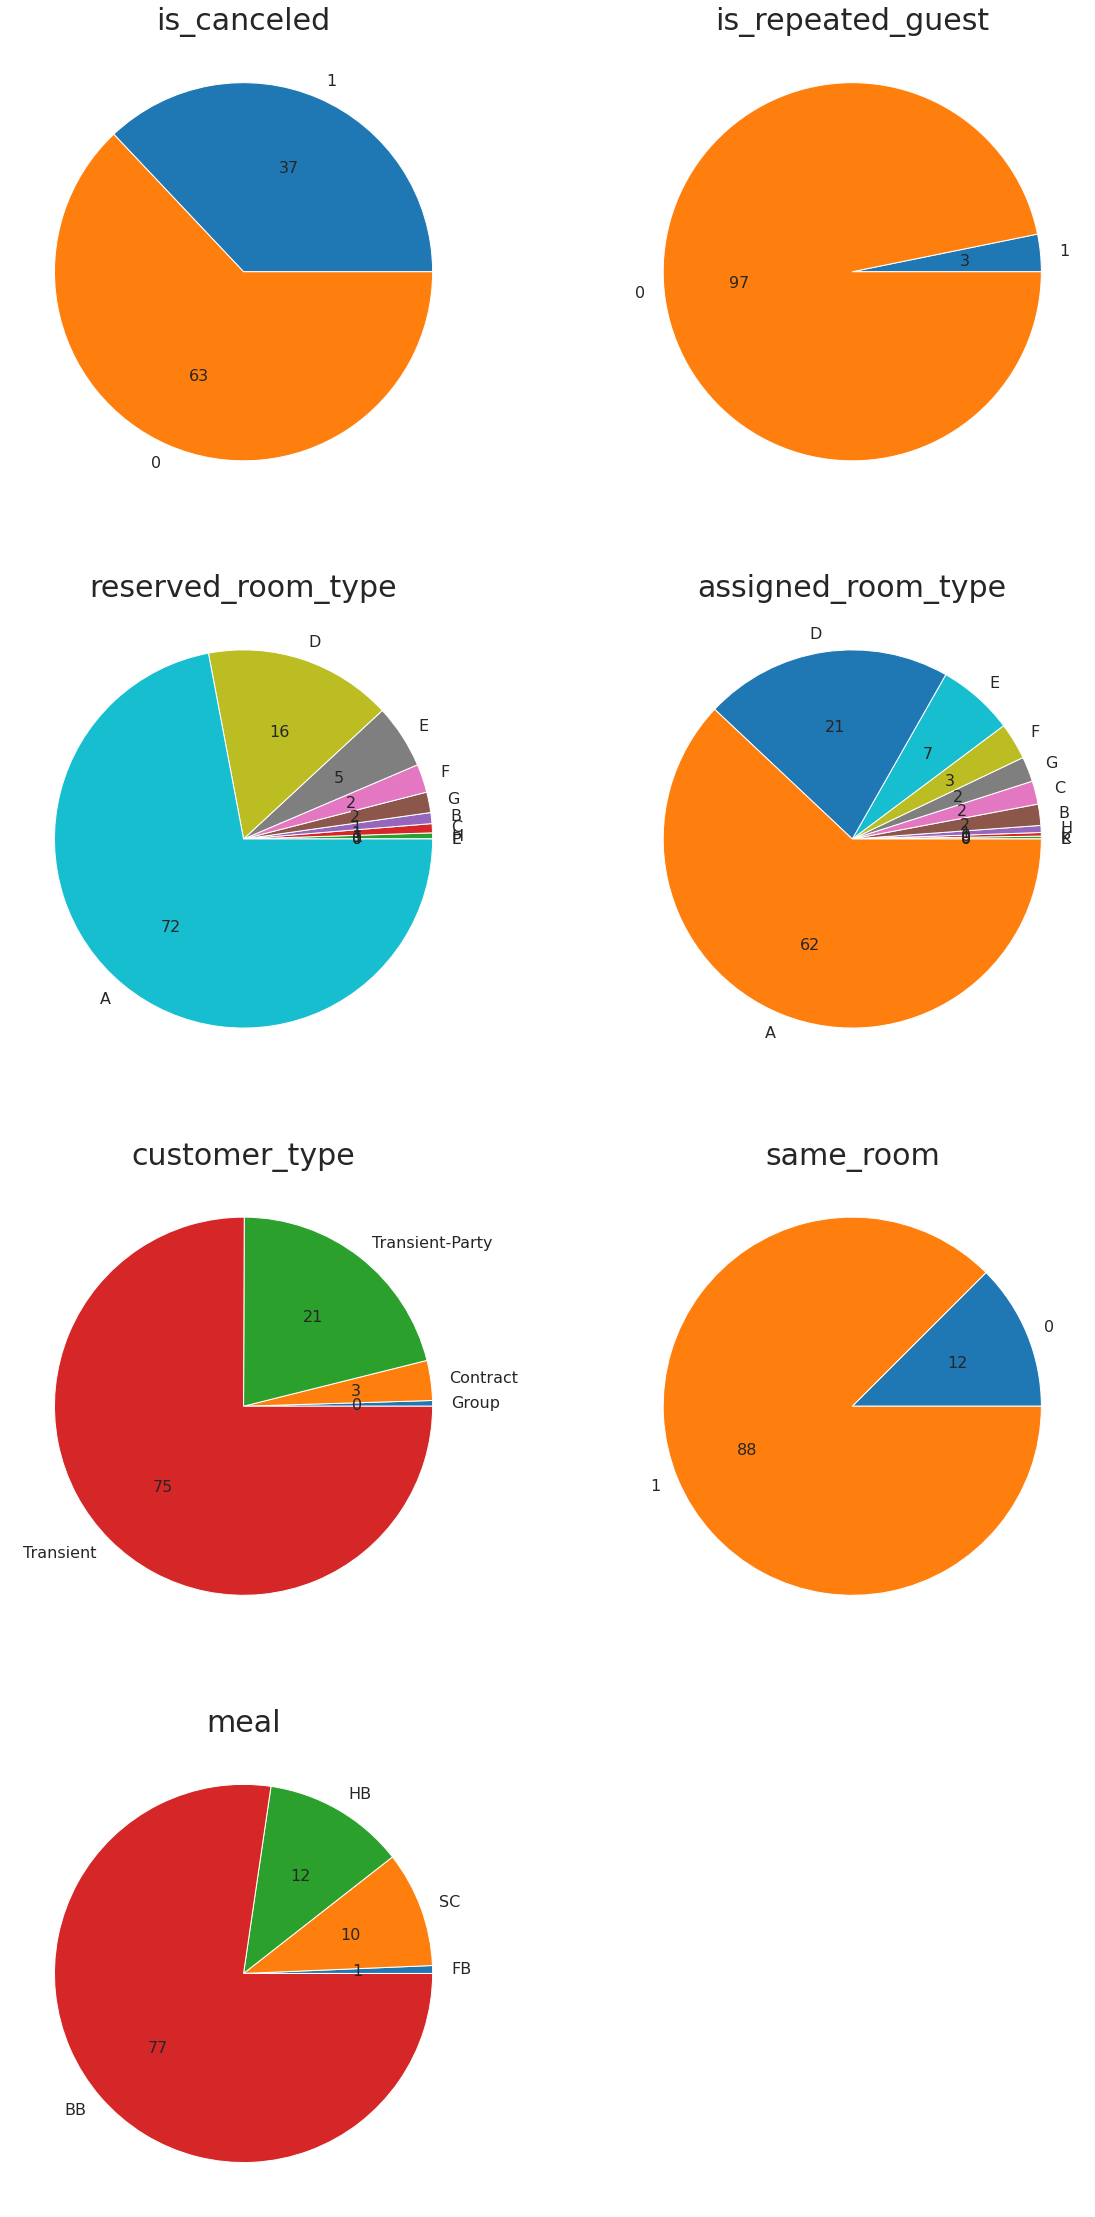

In [19]:
cat_cols1 = ['is_canceled','is_repeated_guest','reserved_room_type','assigned_room_type',
             'customer_type','same_room', 'meal']

plt.figure(figsize=(20,40))
for i, col in enumerate(df[cat_cols1]):
    plt.subplot(4,2,i+1)
    df[col].value_counts()[::-1].plot(kind = 'pie', fontsize=16, autopct='%.0f')
    plt.ylabel('')
    plt.title(col,fontsize=30)
plt.show()

Conclusions:\
1) 63% bookings were done and 37% bookings were cancelled.\
2) Only 3% of guests are repeated.\
3) 72% guests book room type A but only 62% guests were assigned to the room type A.\
4) 75% customers are transient. These are the temporary travellers.\
5) 88% guests were assigned the same room.

# Booking meal package and cancellation

In [20]:
df_meal = df.meal.value_counts().reset_index().rename(columns={'index': 'meal', 'meal': 'count'})
df_meal

,meal,count
0,BB,92310
1,HB,14463
2,SC,11819
3,FB,798


In [21]:
# Here we can replace 'Undefined' with 'SC' which means no meal package.
df['meal'] = df.meal.replace('Undefined', 'SC')
pd.crosstab([df.hotel,df['meal']], df['is_canceled'], normalize = 'index')

is_canceled               0         1
hotel        meal                    
City Hotel   BB    0.571993  0.428007
             FB    0.204545  0.795455
             HB    0.620228  0.379772
             SC    0.624858  0.375142
Resort Hotel BB    0.738610  0.261390
             FB    0.412467  0.587533
             HB    0.683445  0.316555
             SC    0.769721  0.230279

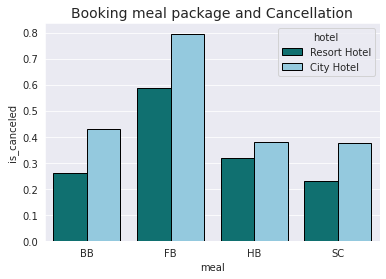

In [22]:
sns.barplot(x='meal', y='is_canceled', data=df, hue='hotel',
           ci=False, palette=['teal','skyblue'], edgecolor='k')
plt.title("Booking meal package and Cancellation", fontsize=14)
plt.show()

## Distribution Channel most likely to cancel

In [23]:
pd.crosstab([df['hotel'],df['distribution_channel']], df['is_canceled'], normalize = 'index')

is_canceled                               0         1
hotel        distribution_channel                    
City Hotel   Corporate             0.769366  0.230634
             Direct                0.818289  0.181711
             GDS                   0.808290  0.191710
             TA/TO                 0.549743  0.450257
             Undefined             0.000000  1.000000
Resort Hotel Corporate             0.789538  0.210462
             Direct                0.831532  0.168468
             TA/TO                 0.685082  0.314918
             Undefined             1.000000  0.000000

In [24]:
# from the table above, we can see that Travel Agent or Tour Operator is the biggest booking distribution channel. 
# As there are also undefined values, we will impute these with the most frequent value in the column i.e with mode.
# in this case mode is TA/TO
df['distribution_channel'] =  df['distribution_channel'].str.replace('Undefined', 'TA/TO')

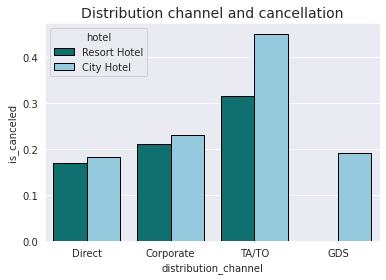

In [25]:
sns.barplot(x='distribution_channel', y='is_canceled', data=df, hue='hotel',
           ci=False, palette=['teal','skyblue'], edgecolor='k')
plt.title("Distribution channel and cancellation", fontsize=14)
plt.show()

Travel Agent / Tour Operators has the highest cancellation rate among all the distribution channel for both the hotel types whereas direct has the lowest cancellation rate for both the hotel types.




# Deposit type most likely to cancel

In [26]:
pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')

is_canceled,0,1
deposit_type,,
No Deposit,0.716230,0.283770
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


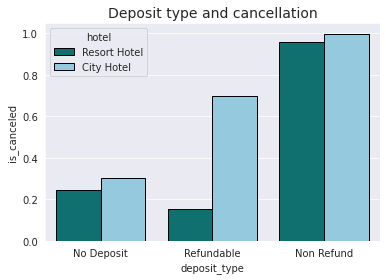

In [27]:
sns.barplot(y='is_canceled',x='deposit_type', data=df, hue='hotel',
           ci=False, palette=['teal','skyblue'], edgecolor='k')
plt.title("Deposit type and cancellation", fontsize=14)
plt.show()

non refundable deposit has the highest cancellation rate among all deposit types

# Parking Spaces and Cancellation

In [28]:
pd.crosstab([df.hotel, df['required_car_parking_spaces']], df['is_canceled'], normalize='index')

is_canceled                                      0         1
hotel        required_car_parking_spaces                    
City Hotel   0                            0.572348  0.427652
             1                            1.000000  0.000000
             2                            1.000000  0.000000
             3                            1.000000  0.000000
Resort Hotel 0                            0.678276  0.321724
             1                            1.000000  0.000000
             2                            1.000000  0.000000
             3                            1.000000  0.000000
             8                            1.000000  0.000000

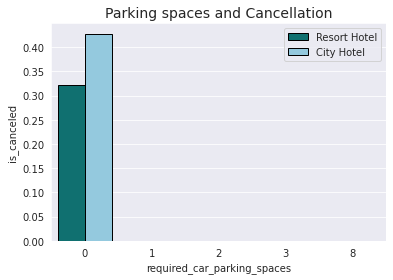

In [29]:
sns.barplot(x='required_car_parking_spaces', y='is_canceled', data=df, hue='hotel',
           ci=False, palette=['teal','skyblue'], edgecolor='k')
plt.title("Parking spaces and Cancellation", fontsize=14)
plt.legend(loc=1)
plt.show()

Here we see that, customers who needed a parking sapce for their vehicle actually never cancelled their hotel booking.



# Repeated Guests and Cancellation

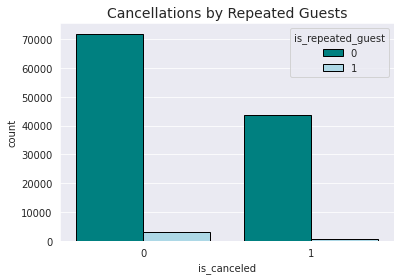

In [30]:
sns.countplot(x = "is_canceled",hue = 'is_repeated_guest', 
              edgecolor='k',saturation=1, linewidth=1,  
              palette=['teal','lightblue'], data = df)
plt.title('Cancellations by Repeated Guests', fontsize=14)
plt.show()

# **Analysis on Exploratory Questions**

# Which type of hotel is most likely to be cancelled?

In [31]:
df1=pd.DataFrame(df.groupby('hotel')['is_canceled'].mean()*100)
df1

,is_canceled
hotel,
City Hotel,41.726963
Resort Hotel,27.763355


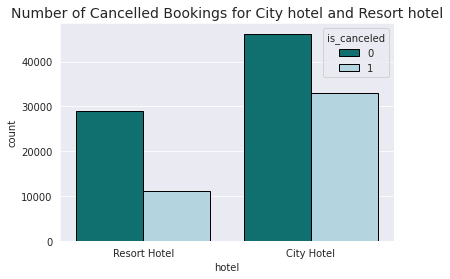

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(df['hotel'], data = df, hue='is_canceled',
              palette = ['teal','lightblue'], edgecolor='k');

plt.title("Number of Cancelled Bookings for City hotel and Resort hotel",
         fontsize=14)
plt.show()

# Which was the mostly booked accommodation type?

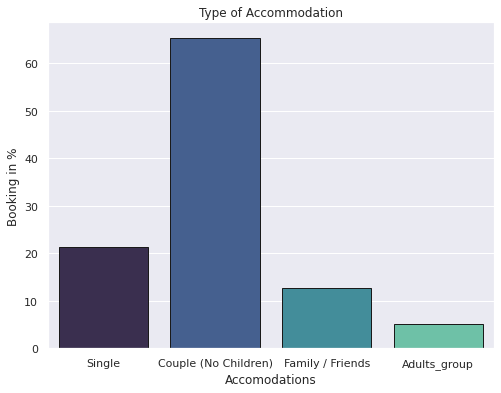

In [61]:
# selecting  only those booking which did not get cancelled.
df_not_canceled = df[df['is_canceled'] == 0]

# Select single, couple, adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]
adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]

# create the list of Category names and its total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends', 'Adults_group']
count = [single.shape[0],couple.shape[0], family.shape[0],adults.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

plt.figure(figsize=(8,6))
sns.barplot(x=names, y=count_percent, data=df, 
            palette='mako', edgecolor='k')
plt.title("Type of Accommodation")
plt.xlabel('Accomodations')
plt.ylabel('Booking in %')
plt.show()

The trend shows that the majority of reservations are for couples.\
The second highest trend is for single person. It can be assumed that these are the solo travelers.


# Where do the guests come from?

In [34]:
country_booking = df['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
country_booking.head(10)

,country,Percentage
0,PRT,0.406986
1,GBR,0.101591
2,FRA,0.087235
3,ESP,0.071765
4,DEU,0.061035
5,ITA,0.031544
6,IRL,0.028269
7,BEL,0.019616
8,BRA,0.018628
9,NLD,0.017623


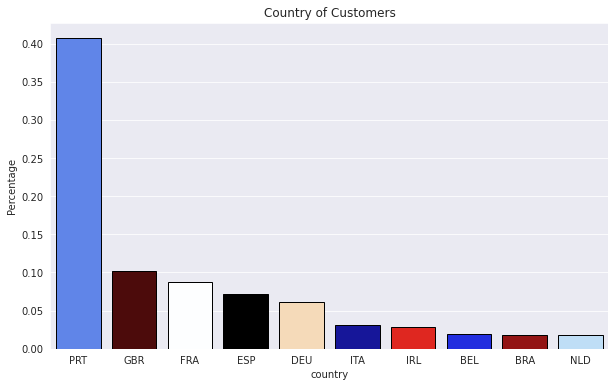

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='country', y='Percentage', data=country_booking.head(10),
           palette = 'flag', edgecolor='k')
plt.title('Country of Customers')
plt.show()

* Graph shows that the majority of reservations are made for Portugal followed by Great Britain and France. However, there is big drop to the most popular country.
* Reservations for rest of the countries are below 10%. 
* The bar slowly decreases after the second most popular country.


# Which year and month has the maximum number of bookings?

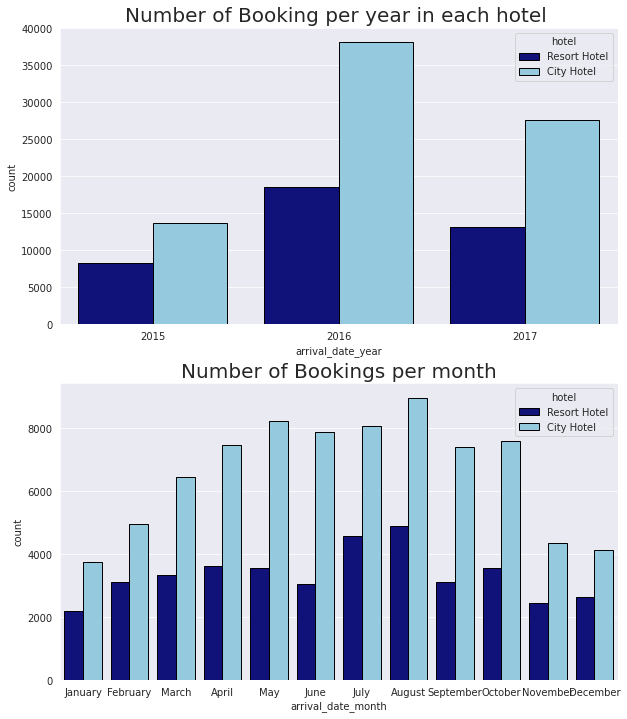

In [36]:
# arrival per year and month
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,
              palette=['darkblue','skyblue'], edgecolor='k')
plt.title("Number of Booking per year in each hotel ", size=20)

months=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August','September', 'October', 'November', 'December']
plt.subplot(2, 1, 2)
sns.countplot(x = 'arrival_date_month', hue='hotel', data=df, order=months,
              palette=['darkblue','skyblue'], edgecolor='k')
plt.title('Number of Bookings per month', size=20)
#plt.subplots_adjust(right=1.7)

plt.show()

We can see most of the bookings were in the year 2016 and bookings were done in City hotel
Most bookings were done in the month of May,June, July, August.
It is clear that August, July and May are the most occupied months in case of both City and Resort Hotels

# Which country has the highest number of reservations?

In [37]:
# Create data of  top 10 countries
df_prt = df[df['country'] == 'PRT']
df_gbr = df[df['country'] == 'GBR']
df_fra = df[df['country'] == 'FRA']
df_esp = df[df['country'] == 'ESP']
df_deu = df[df['country'] == 'DEU']
df_ita = df[df['country'] == 'ITA']
df_irl = df[df['country'] == 'IRL']
df_bel = df[df['country'] == 'BEL']
df_bra = df[df['country'] == 'BRA']
df_nld = df[df['country'] == 'NLD']

# Create a dataset by combining data of top 10 countries
df_top10 = pd.concat([df_fra, df_gbr, df_prt, df_deu, df_esp,
                        df_ita,df_irl, df_bel, df_bra, df_nld]).reset_index(drop=True)

In [38]:
reservations = df_top10.groupby(['country','reservation_status']).lead_time.count()
print(reservations)

country  reservation_status
BEL      Canceled                464
         Check-Out              1868
         No-Show                  10
BRA      Canceled                799
         Check-Out              1394
         No-Show                  31
DEU      Canceled               1205
         Check-Out              6069
         No-Show                  13
ESP      Canceled               2145
         Check-Out              6391
         No-Show                  32
FRA      Canceled               1902
         Check-Out              8481
         No-Show                  32
GBR      Canceled               2412
         Check-Out              9676
         No-Show                  41
IRL      Canceled                825
         Check-Out              2543
         No-Show                   7
ITA      Canceled               1315
         Check-Out              2433
         No-Show                  18
NLD      Canceled                382
         Check-Out              1717
         N

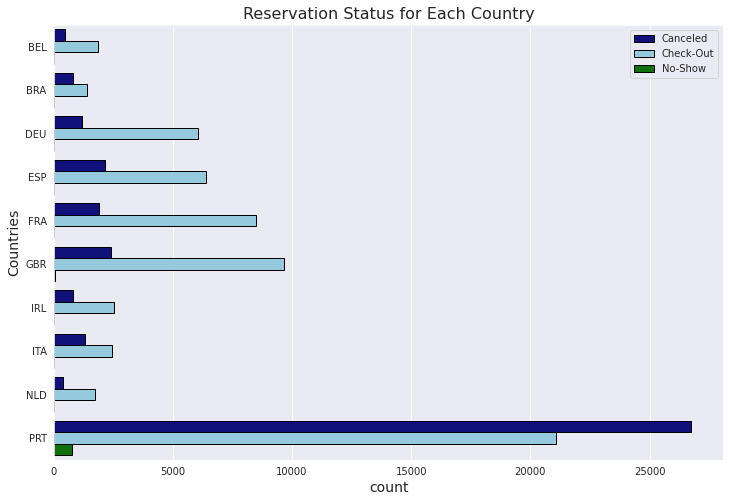

In [39]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'lead_time', y = 'country', hue = 'reservation_status',
            data = reservations.reset_index(), palette = ['darkblue','skyblue','green'],
            edgecolor='k')  # icefire, ['darkblue','skyblue','green']
plt.title('Reservation Status for Each Country', fontsize = 16)
plt.xlabel('count', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
L=plt.legend()
plt.show()

The above graph depicts that Portugal has the most number of reservations, but it also has more cancelations than check-outs.\
Portuguese nationals make the highest number of reservations. But the number of cancellation is higher than the number of checkouts

# Which month has maximum number of special requests each year?

In [40]:
special_request = df[df['total_of_special_requests'] != 0][['arrival_date_year','arrival_date_month','total_of_special_requests']]
special_request

,arrival_date_year,arrival_date_month,total_of_special_requests
4,2015,July,1
5,2015,July,1
7,2015,July,1
8,2015,July,1
12,2015,July,3
...,...,...,...
119380,2017,August,1
119384,2017,August,2
119386,2017,August,2
119387,2017,August,4


In [41]:
special_req_2015 = df[(df['arrival_date_year'] == 2015) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_req_2015

,arrival_date_month,total_of_special_requests
4,July,1
5,July,1
7,July,1
8,July,1
12,July,3
...,...,...
82645,December,2
82650,December,2
82732,December,1
82958,August,1


In [42]:
# Sorting months 
months = special_req_2015.arrival_date_month.unique()
special_req_2015['arrival_date_month'] = pd.Categorical(special_req_2015['arrival_date_month'], categories=months, ordered=True)
month_wise_special_req_2015 = special_req_2015.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2015

,arrival_date_month,total_of_special_requests
0,July,1226
1,August,2188
2,September,1869
3,October,1953
4,November,950
5,December,1392


In [43]:
special_req_2016 = df[(df['arrival_date_year'] == 2016) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_req_2016.head()

,arrival_date_month,total_of_special_requests
3738,January,1
3739,January,1
3740,January,1
3741,January,2
3743,January,1


In [44]:
# Sorting months
months = special_req_2016['arrival_date_month'].unique()
special_req_2016['arrival_date_month'] = pd.Categorical(special_req_2016['arrival_date_month'], categories=months, ordered=True)
month_wise_special_req_2016 = special_req_2016.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2016

,arrival_date_month,total_of_special_requests
0,January,988
1,February,1622
2,March,2079
3,April,2223
4,May,2342
5,June,2633
6,July,3039
7,August,3454
8,September,3399
9,October,3563


In [45]:
special_req_2017 = df[(df['arrival_date_year'] == 2017) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
#special_request_of_2017.head()

In [46]:
# Sorting months
months = special_req_2017['arrival_date_month'].unique()
special_req_2017['arrival_date_month'] = pd.Categorical(special_req_2017['arrival_date_month'], categories=months, ordered=True)
month_wise_special_req_2017 = special_req_2017.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2017

,arrival_date_month,total_of_special_requests
0,January,2258
1,February,2619
2,March,2793
3,April,3560
4,May,3938
5,June,3536
6,July,4240
7,August,4581


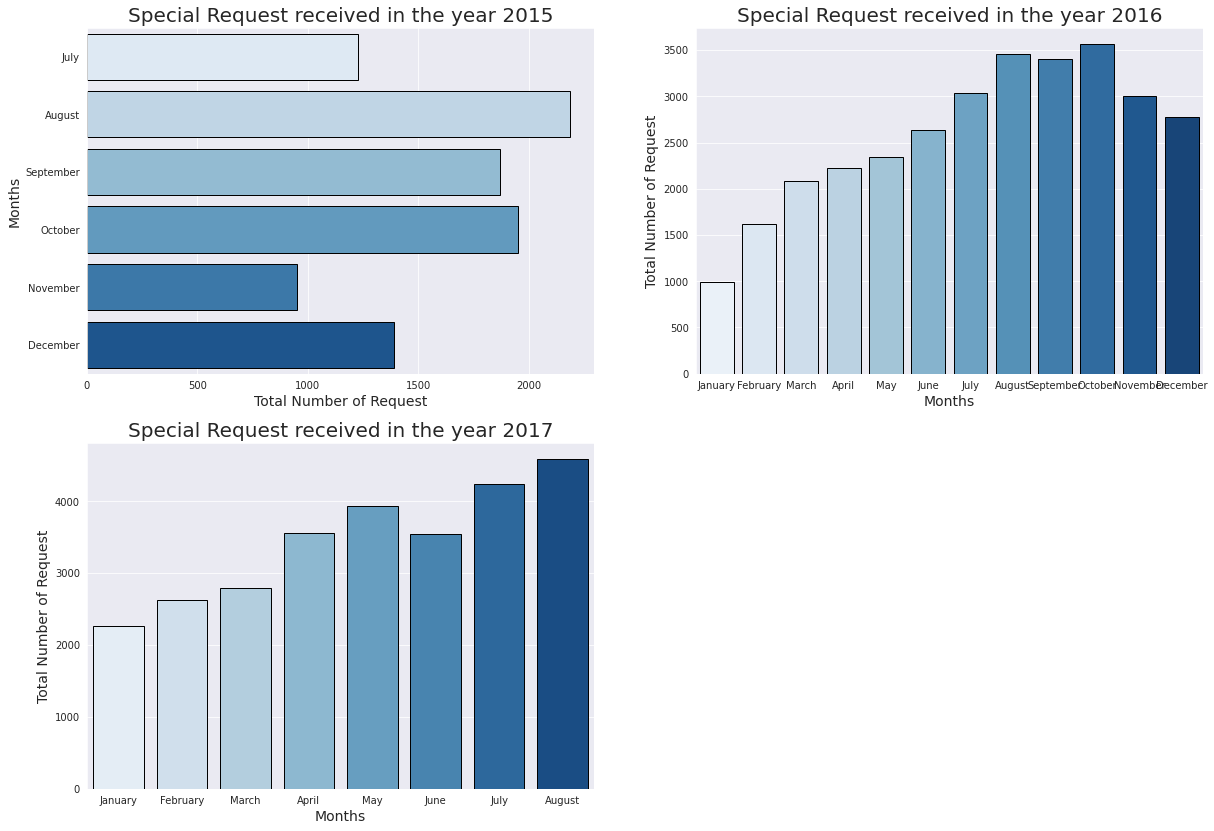

In [47]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.barplot(y='arrival_date_month', x='total_of_special_requests',
           data=month_wise_special_req_2015, palette='Blues', 
            edgecolor='k')
plt.title('Special Request received in the year 2015', fontsize = 20)
plt.ylabel('Months', fontsize = 14)
plt.xlabel('Total Number of Request', fontsize = 14)

plt.subplot(2,2,2)
sns.barplot(x='arrival_date_month', y='total_of_special_requests',
           data=month_wise_special_req_2016, palette='Blues',
            edgecolor='k')
plt.title('Special Request received in the year 2016', fontsize = 20)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Total Number of Request', fontsize = 14)

plt.subplot(2,2,3)
sns.barplot(x='arrival_date_month', y='total_of_special_requests',
           data=month_wise_special_req_2017, palette='Blues',
            edgecolor='k')
plt.title('Special Request received in the year 2017', fontsize = 20)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Total Number of Request', fontsize = 14)

plt.show()

•	From the above graphs, it can be observed that in the year 2015, hotels received maximum number of special requests in the month of August followed by October and September \
•	In the year 2016, October has the highest number of special request followed by August and September.\
•	In the year 2017, August, July and May are the top 3 months with maximum special requests.\
•	One thing to notice here is that only 2016 has complete information, whereas 2015 and 2017 consists information of only few months.


# What are the deposit types and cancellations for each market segment?

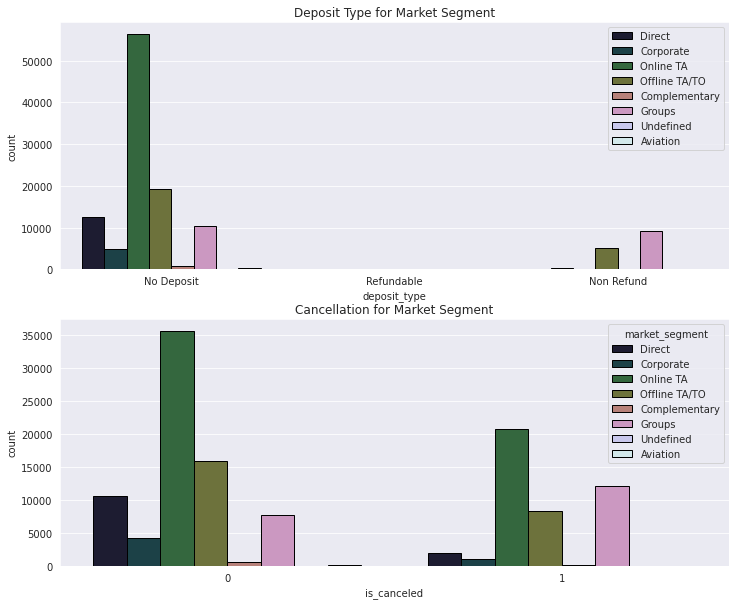

In [48]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(data=df,x='deposit_type',hue='market_segment',
             palette='cubehelix', edgecolor='k')
plt.title('Deposit Type for Market Segment')
plt.legend(loc = 1)
plt.subplot(212)
sns.countplot(data=df,x='is_canceled',hue='market_segment',
             palette='cubehelix', edgecolor='k')
plt.title('Cancellation for Market Segment')
plt.show()

Deposit type for market segment:\
•	Online TA has the highest booking with No Deposit. Whereas Groups and Offline TA/TO has Non Refund booking.\
•	Now a days it is easy to book a hotel using Online TA, most of the Online TA offers the customers without deposit facility.\

Cancellation for market segment:\
•	Online TA has the highest booking cancellation. Most of the Online TA provides the customers facility to cancel booking without any charges.



# Which market segment has the lowest number of days on waiting list?

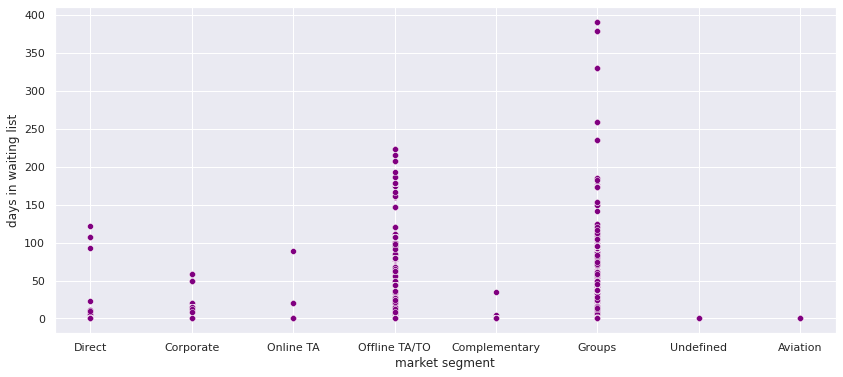

In [49]:
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.scatterplot(df['market_segment'],df['days_in_waiting_list'],
               color='Purple')
plt.xlabel('market segment')
plt.ylabel('days in waiting list')
plt.show()

* Aviation industry has the minimum number of days on waiting list because when a flight is landed, the flight crew needs to be accommodated immediately.
Hence, the working staff does not entertain those hotels which fails to provide them immediate accommodation.
* Customers booking through Groups and Offline TA/TO segments has the highest days on the waiting list.

# How much do customers pay for a room per night?

In [50]:
df2=df[df['is_canceled']==0]

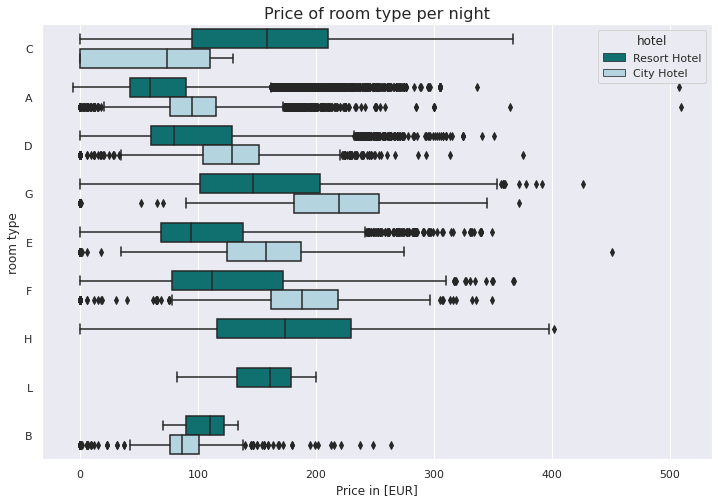

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x='adr', y='reserved_room_type', data=df2,hue='hotel',
            palette=['teal','lightblue']) # adr stands for prize of the room  
plt.title('Price of room type per night', fontsize=16)
plt.xlabel('Price in [EUR]' )
plt.ylabel('room type')
plt.show()

•	The above figure shows the average price per room, depending on its type and the standard deviation.\
•	From the above graph it is clear that the Room type A has the highest outlier i.e highest price that is 500 euro.\
•	Whereas in City Hotel prices are high for Room type G.


# What are the prices per month for both the types of hotels?

In [52]:
df_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
df_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

resort_hotel = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

merge_hotel = resort_hotel.merge(city_hotel, on='arrival_date_month')
merge_hotel.columns = ['months', 'resort_price', 'city_price']
merge_hotel

,months,resort_price,city_price
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


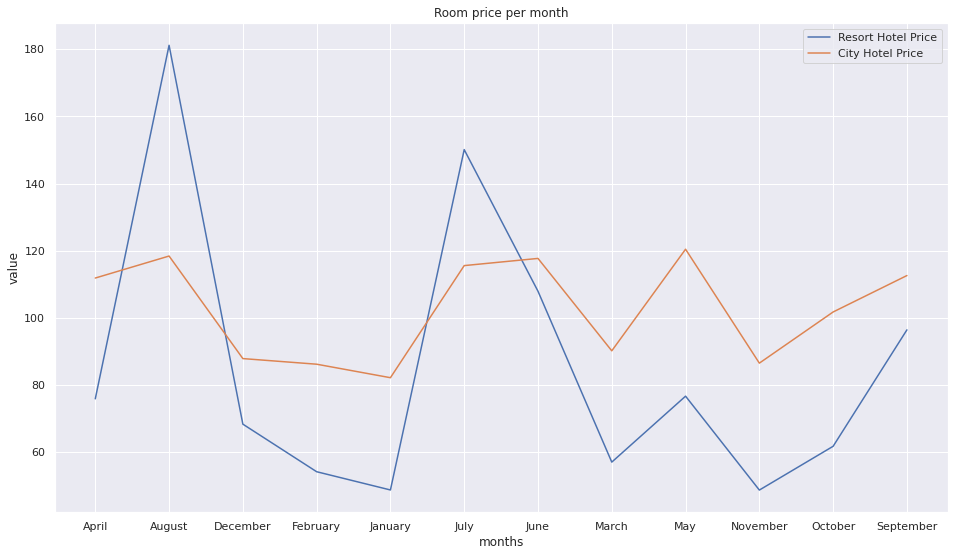

In [53]:
plt.figure(figsize = (16, 9))
sns.set(style='darkgrid')
sns.lineplot(data = merge_hotel, x = 'months', y = 'resort_price',label='Resort Hotel Price')
sns.lineplot(data = merge_hotel, x = 'months', y = 'city_price',label='City Hotel Price')
plt.title("Room price per month")
plt.xlabel('months')
plt.ylabel('value')
plt.legend()
plt.show()

*	The above graph clearly shows that the prices in the Resort Hotel are much higher during the months of August and July.
*	Whereas the prices of the City Hotel varies less and is most expensive during May, June, July and August.
*	Prices of the Resort Hotel are much higher. It seems that it is definitely the case since the Resort Hotels specialize in that. Prices of the City Hotel do not fluctuate that much.


# **Correlation**

Correlation is a term used to represent the statistical measure of linear relationship between two variables. It can also be defined as the measure of dependance between two different variables.

Here I have used Heatmap for the same.\
Correlation Heatmap is a graphical representation of correlation matrix representing correlation between different variables.\
Below I have created a heatmap to understand the linear relationship between variables in the data.

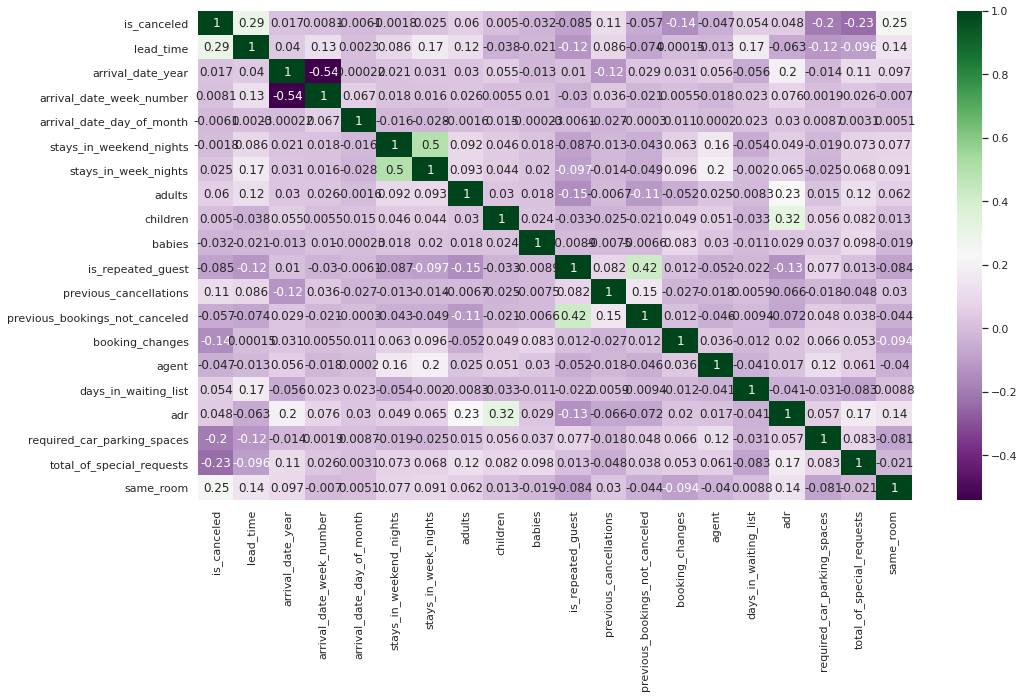

In [54]:
# finding the relations between the variables
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap='PRGn',annot=True)
plt.show()

From the above heatmap, we observe the following:

*	We see that is_canceled is correlated by 29% lead_time is the only feature that has positive correlation with is_canceled feature.
*	Most of the variables have an insignificant level of correlation with the is_canceled feature.
*	adr and children are positively correlated by 32%.
*	total_of_special_requests and required_car_parking_spaces have negative correlation with is_canceled feature.


# **Most Important factors for cancellation of bookings**

In [55]:
cancel_corr=df.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
same_room                         0.247770
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

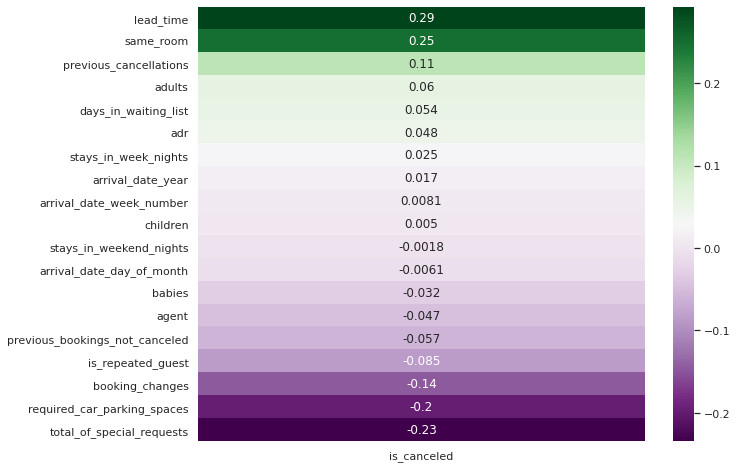

In [56]:
plt.figure(figsize=(10,8))
#cancel_corr.abs().sort_values(ascending=False)[1:]
sns.heatmap(df.corr()[['is_canceled']].sort_values('is_canceled',ascending=False)[1::],
                                                    annot=True,cmap='PRGn')

* Lead_time is the most highly correlated feature with is_canceled.
* total_of_special_requests is the second feature with strongest correlation to is_canceled
* It is negatively correlated with is_canceled.
* required_car_parking_spaces is the third feature with strongest correlation to is_canceled feature. It is also negatively correlated with is_canceled.

# **What is the relationship between lead time and cancellation?**

Here I have used regression plot in seaborn. It is primariliy intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis. It creates a regression line between two parameters and helps to visualize their linear relatioships.

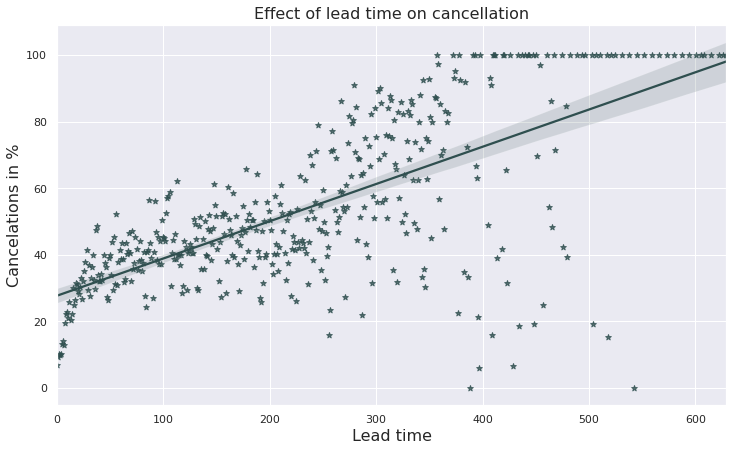

In [57]:
lead_cancel = df.groupby("lead_time")["is_canceled"].describe()
lead_cancel_10 = lead_cancel.loc[lead_cancel["count"] >= 10]

plt.figure(figsize=(12, 7))
sns.regplot(x=lead_cancel_10.index, y=lead_cancel_10["mean"].values * 100,
            color="darkslategrey", marker='*'); #"darkslategrey"
plt.title("Effect of lead time on cancellation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations in %", fontsize=16)
plt.show()

The above graph depicts that, as the lead time increases, the number of cancellations also increases. Hence, lead time and cancellation are directly proportional to each other.

# **Summary Report**

Majority of the hotels booked are city hotel. This shows that most people tend to stick with the less-expensive side of the two hotel choices, thus picking the city hotels.
looking at the bookings we can see that there are more bookings that are canceled than those that are not canceled.
Of the ones that are canceled, there are far more city hotels having been cancelled than resort hotels.

Majority of the reservations are made by couples. The second highest bookings are for the solo travellers. 

Majority of the guests are from Western Europe especially from Portugal.
It shows that the data source must be from the hotels located in Portugal
The rest of the countries are less than 10% each.

Most of the visitors aren't repeated guests, so there is a need to draw them back to the same place they booked. These people don't like booking on a contract or in groups either!. One thing can be done is to target our advertisement on guests to increase returning guests.

Portugal has the highest number of reservations. But it also has high cancellation rate than check-outs.

Out of the years 2015 to 2017, 2016 was the year with majority of hotel bookings. Out of all the month August had the highest number of hotel bookings.
In the year 2015, August, October and September were the months with maximum special requests. In the year 2016, October received highest number of special requests. August and September were the 2nd and 3rd months with maximum special requests respectively. Also one thing I noticed is that only year 2016 consists of all the 12 months unlike the year 2015 and 2017 which consists of only few months.

The highest booking is using Online TA  with no deposit. Whereas Groups and Offline TA/TO.
Most of the Online TA offers customers without deposit facility. Also by looking at the Offline TA/TO and Groups./
the deposit was received only in the situation when the groups came.

The highest booking cancellation is using online TA. Customers are provided with facility to cancel booking without any charges.
Group segment has cancellation rate around 50%. It does not matter if hotel has parking space. Most customer do not consider it as a preference while booking hotels.

Aviation industry has the minimum number of days on waiting list because when a flight is landed, the flight crew needs to be accommodated immediately.
Hence, the working staff does not entertain those hotels which fails to provide them immediate accommodation.

As far as the pricing is concerned, Resort Hotel tends to fluctuate a lot throughout the year, with low prices in the winter and high prices in the summer.
Whereas City Hotel varies less. This is probably due to the convenience of being in a city lifestyle.

From the correlation we have observed that lead_time is the only feature which is positively correlated to is_canceled feature.
Also total_of_special_requests and required_car_parking_spaces are inversely proportional with is_canceled feature.
As the as lead time increases the chances of cancellation also increases. Also as the number of special requests increase, the chances of cancellation reduces. 
we have also seen that lead_time, total_of_special_requests & required_car_parking_spaces are the most important factors for cancellation of bookings.


# **Conclusion**

In this project, I have carried out operations like handling missing values and then performed exploratory data analysis to extract information from the data and answered exploratory questions.\
Thank you for viewing this project.
